#  Estadística Descriptiva con Wine Quality




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['axes.grid'] = True

## 1) Cargar datos

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")
df.head()

Filas: 1599 | Columnas: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2) Calidad de datos

In [4]:
nulls = df.isna().sum()
nulls[nulls > 0] if nulls.sum() > 0 else print('Sin nulos')

Sin nulos


## 3) Resumen básico

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 4) Métricas clave (columna ejemplo)

In [6]:
# Elegimos 'alcohol' como ejemplo
col = 'alcohol'

media = df[col].mean()
mediana = df[col].median()
moda = df[col].mode().iat[0]
varianza = df[col].var()
desv = df[col].std()
minimo = df[col].min()
maximo = df[col].max()

pd.DataFrame({
    'métrica': ['media','mediana','moda','varianza','desv. estándar','mínimo','máximo'],
    'valor':   [media, mediana, moda, varianza, desv, minimo, maximo]
})

,métrica,valor
0,media,10.422983
1,mediana,10.200000
2,moda,9.500000
3,varianza,1.135647
4,desv. estándar,1.065668
5,mínimo,8.400000
6,máximo,14.900000


## 5) Visualizaciones esenciales

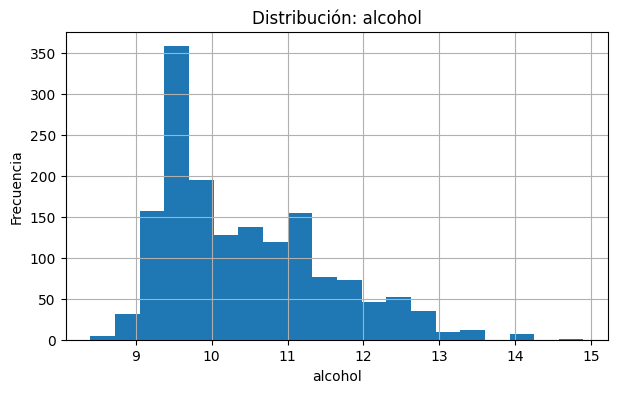

In [7]:
plt.figure()
plt.hist(df[col].dropna(), bins=20)
plt.title(f'Distribución: {col}')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipython-input-3111612275.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col].dropna(), vert=True, labels=[col])


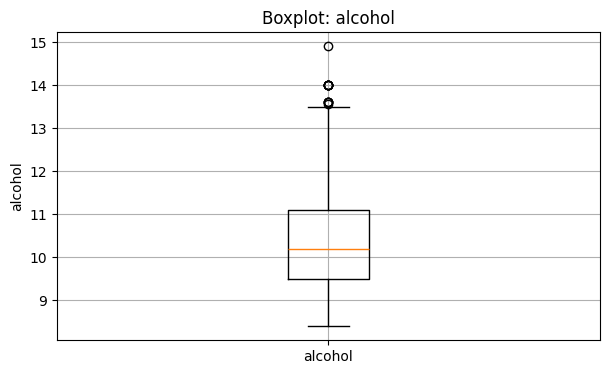

In [8]:
plt.figure()
plt.boxplot(df[col].dropna(), vert=True, labels=[col])
plt.title(f'Boxplot: {col}')
plt.ylabel(col)
plt.show()

## 6) Correlaciones (vista rápida)

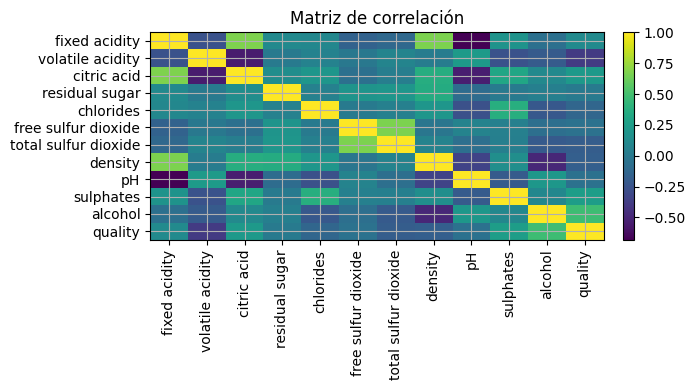

In [9]:
corr = df.corr(numeric_only=True)

plt.figure()
im = plt.imshow(corr, aspect='auto')
plt.title('Matriz de correlación')
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=range(len(corr.columns)), labels=corr.columns)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

## 7) Cierre
- Cargamos dataset de vino tinto.
- Revisamos nulos y estadísticas.
- Graficamos distribución, boxplot y correlaciones.


## 8) Comparación con la variable objetivo (quality)
Veamos cómo se relacionan algunas variables clave con la calidad del vino.

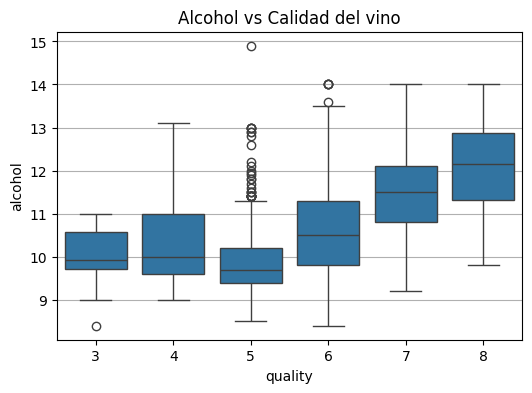

In [10]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol vs Calidad del vino')
plt.show()

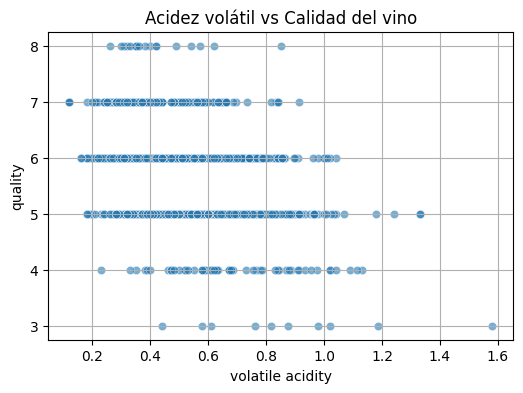

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='volatile acidity', y='quality', data=df, alpha=0.6)
plt.title('Acidez volátil vs Calidad del vino')
plt.show()

In [12]:
df.corr(numeric_only=True)['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


In [17]:
# Calcular la media, mediana y moda para todas las columnas numéricas
summary_stats = df.agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None])

display(summary_stats)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
median,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
<lambda>,7.200000,0.600000,0.000000,2.000000,0.080000,6.000000,28.000000,0.997200,3.300000,0.600000,9.500000,5.000000


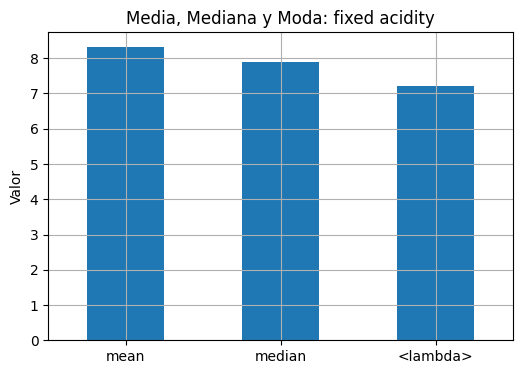

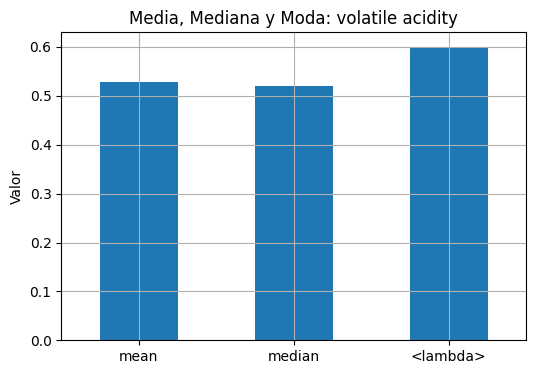

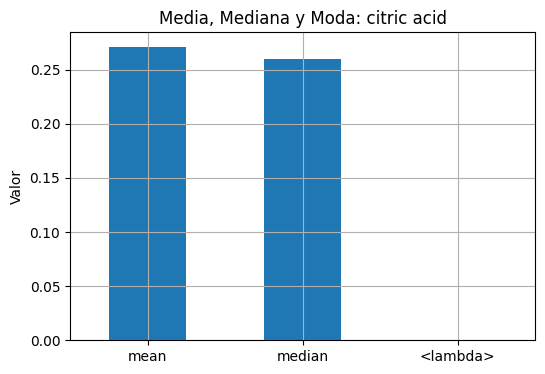

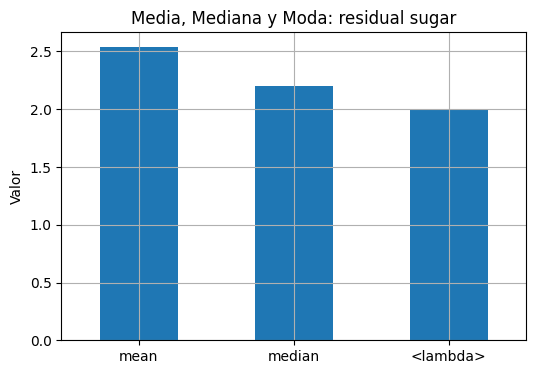

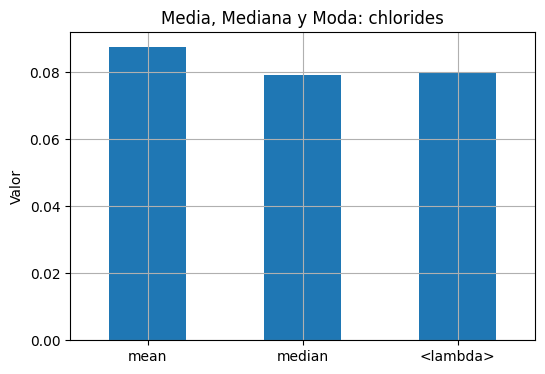

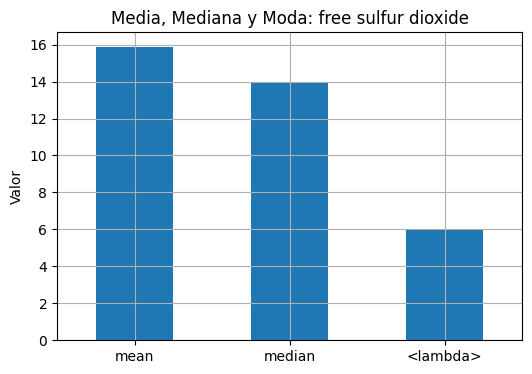

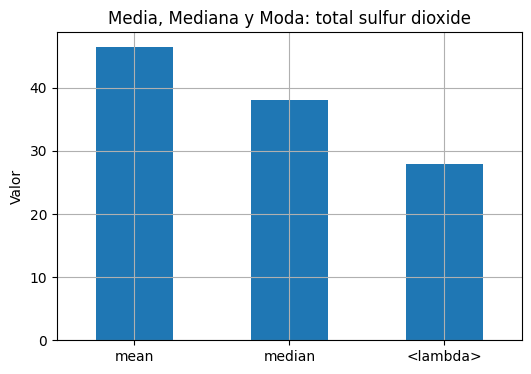

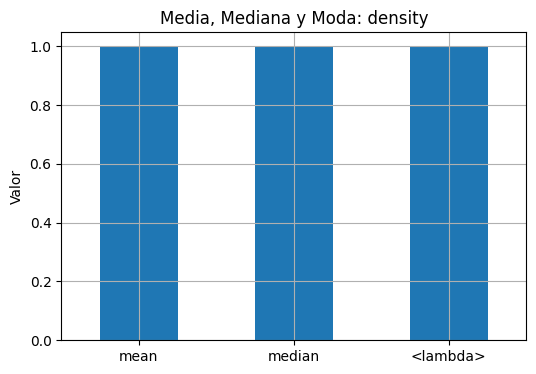

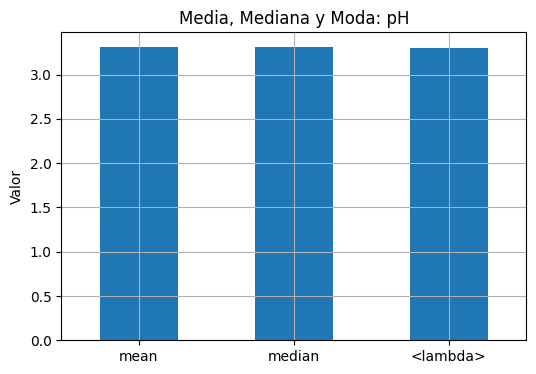

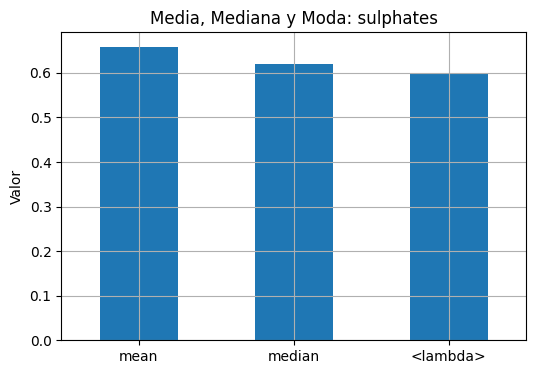

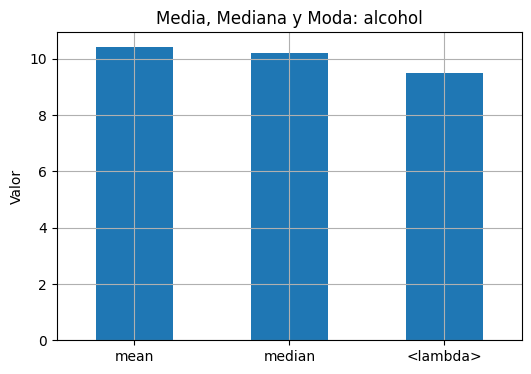

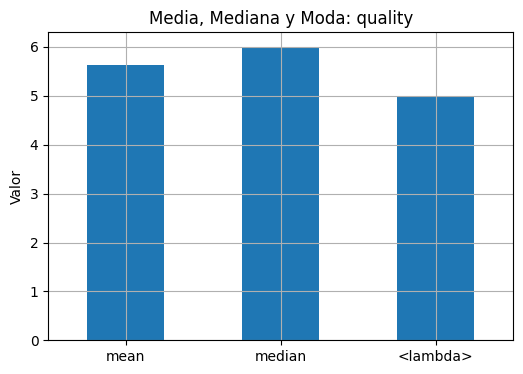

In [16]:
summary_stats = df.agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None])
summary_stats = summary_stats.rename(columns={'<lambda_0>': 'mode'})

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    summary_stats[col].plot(kind='bar')
    plt.title(f'Media, Mediana y Moda: {col}')
    plt.ylabel('Valor')
    plt.xticks(rotation=0)
    plt.show()